In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Dataset: beer_foam.csv

Source: J.J. Hackbarth (2006). "Multivariate Analyses of Beer Foam Stand,"
Journal of the Institute of Brewing, Vol. 112, #1, pp. 17-24

Description: Measurements of wet foam height and beer height at various
time points for Shiner Bock at 20C. Author fits exponential decay model:
H(t) = H(0)*exp(-lambda*t)

Variables/Columns
TIME: Time from pour (seconds)  4-8
FOAM: Wet foam height (cm)  10-16
BEER: Beer height (cm)    18-24

**Hypothesis**: Can we predict the time from pour using the measurements of foam height and beer height?


In [4]:
# Read the csv file into a pandas DataFrame

foam = pd.read_csv('lyftPricesNew.csv')
foam.head()

,id,place,lat,lon,dist,display_name,duration,estimate,high_estimate,low_estimate,autotime,time,day,company
0,1,Centennial Park,33.76035,-84.3957,1.71,Shared,585,4-Feb,4,2,23:11,23:00,Thursday,Lyft
1,2,Centennial Park,33.76035,-84.3957,1.71,Lyft,585,8-Jun,8,6,23:11,23:00,Thursday,Lyft
2,3,Centennial Park,33.76035,-84.3957,1.71,Lyft XL,585,12-Sep,12,9,23:11,23:00,Thursday,Lyft
3,4,Centennial Park,33.76035,-84.3957,1.71,Lux,585,15-Dec,15,12,23:11,23:00,Thursday,Lyft
4,5,Centennial Park,33.76035,-84.3957,1.71,Lux Black,585,15 - 18,18,15,23:11,23:00,Thursday,Lyft


In [5]:
# Assign the data to X and y

X = foam[["high_estimate", "low_estimate"]]
y = foam["dist"].values.reshape(-1, 1)
print(X.shape, y.shape)

(64964, 2) (64964, 1)


In [6]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [7]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [8]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.636077961291257
Testing Score: 0.6440152299044097


Text(0.5, 1.0, 'Residual Plot')

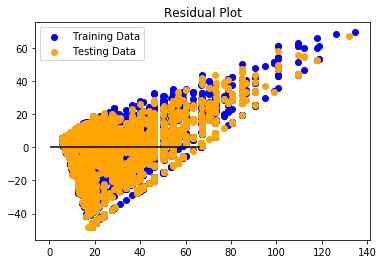

In [9]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION